In [85]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [86]:
df = pd.read_csv('data.csv')

In [87]:
conditions = [
    (df['product_rating'] >= 1) & (df['product_rating'] <= 2),
    (df['product_rating'] > 2) & (df['product_rating'] <= 2.5),
    (df['product_rating'] > 2.5) & (df['product_rating'] <= 3),
    (df['product_rating'] > 3) & (df['product_rating'] <= 3.5),
    (df['product_rating'] > 3.5) & (df['product_rating'] <= 4),
    (df['product_rating'] > 4) & (df['product_rating'] <= 4.5),
    (df['product_rating'] > 4.5) & (df['product_rating'] <= 5)
]

extrapolation_percentages = [
    0,  # No change for ratings between 1 and 2
    0.05,  # 5% extrapolation for ratings between 2 and 2.5
    0.10,  # 10% extrapolation for ratings between 2.6 and 3
    0.20,  # 20% extrapolation for ratings between 3.1 and 3.5
    0.30,  # 30% extrapolation for ratings between 3.6 and 4
    0.40,  # 40% extrapolation for ratings between 4.1 and 4.5
    0.50   # 50% extrapolation for ratings between 4.6 and 5
]

df['extrapolated_review_count'] = df['customer_reviews_count'] + (np.select(conditions, extrapolation_percentages, default=0) * df['customer_reviews_count'])
df['sold_item_count'] = df['extrapolated_review_count']
df['sales'] = df['selling_price']*df['sold_item_count']
df['sales'] = round(df['sales'] / 10**5,2)

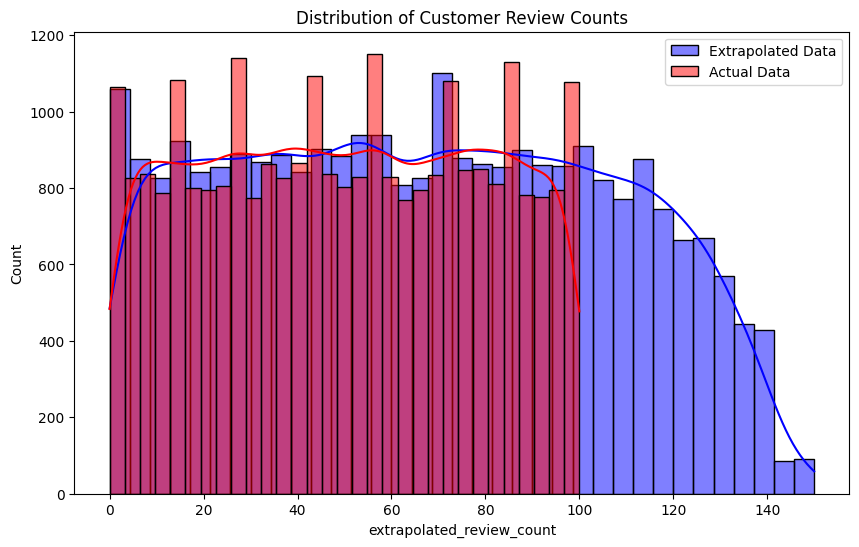

In [88]:

plt.figure(figsize=(10, 6))
sns.histplot(df['extrapolated_review_count'], kde=True, color='blue', label='Extrapolated Data')
sns.histplot(df['customer_reviews_count'], kde=True, color='red', label='Actual Data')
plt.title('Distribution of Customer Review Counts')
plt.legend()
plt.show()

In [89]:
seasonal_top_5= df.groupby('seasonal_indicator')[['seasonal_indicator', 'product_title', 'sales']].apply(lambda x: x.nlargest(5, 'sales')).reset_index(drop=True)
seasonal_top_5

,seasonal_indicator,product_title,sales
0,Autumn,Bravura Clipper,11.54
1,Autumn,U-Clip Clipper,7.49
2,Autumn,Man In Black Eau De Parfum,7.06
3,Autumn,Stories Eau De Parfum,6.25
4,Autumn,Deodorant Body Spray - Private Affairs EDT,5.93
5,Spring,Good Girl Eau De Parfum For Women,7.29
6,Spring,Extra Virgin Olive Oil,6.27
7,Spring,Induction Base Pressure Cooker IFP50,6.24
8,Spring,Perfume - Fresh Blossom Absolute,5.74
9,Spring,Olive Pomace Oil,5.17


In [90]:
fig = px.bar(seasonal_top_5, x='sales', y='product_title', color='seasonal_indicator', text=seasonal_top_5['sales'].apply(lambda x: round(x, 2)),
             title='Top Products by Season and Revenue', 
             labels={'product_title': 'Product Title', 'sales': 'Sales(in lakhs)'})
fig.update_layout(height=800, width=1200)
fig.update_traces(textfont_color='white')
fig.show()

In [91]:
fig = px.sunburst(seasonal_top_5, path=['seasonal_indicator', 'product_title'], values='sales',
                   title='Seasonal Revenue Breakdown', 
                   labels={'seasonal_indicator': 'Season', 'product_title': 'Product Title', 'sales': 'Sales'})

fig.show()

In [92]:
total_sales_by_brand = df.groupby(['brand','seasonal_indicator'])['sales'].sum().reset_index()

total_sales_by_brand = total_sales_by_brand.sort_values(by='sales', ascending=False)

seasonal_top_5= total_sales_by_brand.groupby('seasonal_indicator')[['seasonal_indicator', 'brand', 'sales']].apply(lambda x: x.nlargest(5, 'sales')).reset_index(drop=True)
seasonal_top_5


,seasonal_indicator,brand,sales
0,Autumn,Dkny,23.41
1,Autumn,Wahl,21.74
2,Autumn,Corelle,20.17
3,Autumn,Prestige,18.41
4,Autumn,BB Home,16.97
5,Spring,Dkny,22.06
6,Spring,Prestige,18.34
7,Spring,bb Royal,18.34
8,Spring,BB Home,15.23
9,Spring,Shankara,14.18


In [93]:
fig = px.bar(seasonal_top_5, x='sales', y='brand', color='seasonal_indicator',text=seasonal_top_5['sales'].apply(lambda x: round(x, 2)),
             title='Top Brand by Season and Revenue', 
             labels={'brand': 'Brand', 'sales': 'Sales(in lakhs)'})

# fig.update_layout(xaxis_tickangle=90)  # Rotate x-axis labels for better readability
fig.update_traces(textposition='inside')
fig.update_traces(textfont_color='white')
fig.show()

In [94]:
# All season Products by Revenue

products_all_seasons = df.groupby('product_title').filter(lambda x: x['seasonal_indicator'].nunique() == len(df['seasonal_indicator'].unique()))

product_sales = products_all_seasons.groupby('product_title')['sales'].sum().reset_index()

# product_sales_sorted = product_sales.sort_values(by='sales', ascending=False)
top_5_products = product_sales.nlargest(10, 'sales').reset_index(drop=True)
top_5_products = top_5_products[::-1]

fig = px.bar(top_5_products , x='sales', y='product_title', orientation='h', text=top_5_products['sales'].apply(lambda x: round(x, 2)),
             title='Top Products Available Across All Seasons by Sales', 
             labels={'product_title': 'Product', 'sales': 'Total Sales(in lakhs)'})

fig.show()


In [95]:
# All season Brands by Revenue
total_sales_by_brand = df.groupby(['brand','seasonal_indicator'])['sales'].sum().reset_index()

products_all_seasons = total_sales_by_brand.groupby('brand').filter(lambda x: x['seasonal_indicator'].nunique() == len(df['seasonal_indicator'].unique()))

product_sales = products_all_seasons.groupby('brand')['sales'].sum().reset_index()

top_5_products = product_sales.nlargest(10, 'sales').reset_index(drop=True)
top_5_products = top_5_products[::-1]

fig = px.bar(top_5_products , x='sales', y='brand', orientation='h', text=top_5_products['sales'].apply(lambda x: round(x, 2)),
             title='Top Brands Available Across All Seasons by Sales', 
             labels={'brand': 'Brand', 'sales': 'Total Sales(in lakhs)'})

fig.show()


In [103]:
from scipy.stats import ttest_ind

# Separate discount data for different seasonal indicators
seasons = df['seasonal_indicator'].unique()
seasonal_discounts = {season: df[df['seasonal_indicator'] == season]['discount_offered'] for season in seasons}

# Perform t-test between pairs of seasonal indicators
for i in range(len(seasons)):
    for j in range(i + 1, len(seasons)):
        season1 = seasons[i]
        season2 = seasons[j]
        t_stat, p_value = ttest_ind(seasonal_discounts[season1], seasonal_discounts[season2])
        print(f"T-test between {season1} and {season2}: t-statistic = {t_stat:.2f}, p-value = {p_value:.4f}")

T-test between Spring and Winter: t-statistic = -0.97, p-value = 0.3344
T-test between Spring and Summer: t-statistic = -0.58, p-value = 0.5629
T-test between Spring and Autumn: t-statistic = 0.31, p-value = 0.7596
T-test between Winter and Summer: t-statistic = 0.38, p-value = 0.7047
T-test between Winter and Autumn: t-statistic = 1.27, p-value = 0.2042
T-test between Summer and Autumn: t-statistic = 0.88, p-value = 0.3782


Spring vs. Winter: The t-statistic is negative (-0.97), indicating a slightly lower mean discount in Spring compared to Winter, but the difference is not statistically significant (p-value = 0.3344 > 0.05). Thus, there is no strong evidence of a difference in mean discounts between Spring and Winter.

Spring vs. Summer: The t-statistic is negative (-0.58), suggesting a lower mean discount in Spring compared to Summer, but again, the difference is not statistically significant (p-value = 0.5629 > 0.05). Therefore, there is no strong evidence of a difference in mean discounts between Spring and Summer.

Spring vs. Autumn: The t-statistic is positive (0.31), indicating a slightly higher mean discount in Spring compared to Autumn, and the difference is not statistically significant (p-value = 0.7596 > 0.05). Hence, there is no strong evidence of a difference in mean discounts between Spring and Autumn.

Winter vs. Summer: The t-statistic is positive (0.38), suggesting a slightly higher mean discount in Winter compared to Summer, but the difference is not statistically significant (p-value = 0.7047 > 0.05). Therefore, there is no strong evidence of a difference in mean discounts between Winter and Summer.

Winter vs. Autumn: The t-statistic is positive (1.27), indicating a higher mean discount in Winter compared to Autumn, but the difference is still not statistically significant (p-value = 0.2042 > 0.05). Thus, there is no strong evidence of a difference in mean discounts between Winter and Autumn.

Summer vs. Autumn: The t-statistic is positive (0.88), suggesting a slightly higher mean discount in Summer compared to Autumn, and the difference is not statistically significant (p-value = 0.3782 > 0.05). Therefore, there is no strong evidence of a difference in mean discounts between Summer and Autumn.

In [104]:
### Bundle Indicator
bundle_top= df.groupby('bundle_indicator')[['bundle_indicator', 'product_title', 'sales']].apply(lambda x: x.nlargest(10, 'sales')).reset_index(drop=True)
bundle_top

,bundle_indicator,product_title,sales
0,Bundle,"4 Burner Gas Stove - Marvel Plus Glass Tables,...",8.38
1,Bundle,Olive Oil - Extra Virgin,8.37
2,Bundle,Good Girl Eau De Parfum For Women,7.29
3,Bundle,"Excuse Me, Fleas! Anti-Tick & Flea Dog Shampoo",7.21
4,Bundle,Man In Black Eau De Parfum,7.06
5,Bundle,Perfume - Fresh Blossom Absolute,5.74
6,Bundle,1 Million Prive EDP,5.36
7,Bundle,Pet Food - N&D Team Breeder Puppy Top Farmina,5.12
8,Bundle,Deodorant Body Spray - Del Mar EDT,5.09
9,Bundle,Stainless Steel Contura Pressure Cooker SSC50,5.06


In [97]:
#Top products by Bundle and Revenue
fig = px.bar(bundle_top, x='sales', y='product_title', color='bundle_indicator', text=bundle_top['sales'].apply(lambda x: round(x, 2)),
             title='Top Products by Bundle and Revenue', 
             labels={'product_title': 'Product Title', 'sales': 'Sales(in lakhs)'})

fig.update_layout(height=800, width=1200)
fig.update_traces(textfont_color='white')
fig.show()

In [98]:
#Top brands by Bundle and Revenue
total_sales_by_brand = df.groupby(['brand','bundle_indicator'])['sales'].sum().reset_index()
bundle_top= total_sales_by_brand.groupby('bundle_indicator')[['bundle_indicator', 'brand', 'sales']].apply(lambda x: x.nlargest(10, 'sales')).reset_index(drop=True)
bundle_top

,bundle_indicator,brand,sales
0,Bundle,Dkny,37.73
1,Bundle,Prestige,36.58
2,Bundle,bb Royal,34.80
3,Bundle,BB Home,32.01
4,Bundle,bb Combo,26.78
5,Bundle,Soulflower,25.49
6,Bundle,Hawkins,24.77
7,Bundle,INATUR,24.71
8,Bundle,Huggies,24.62
9,Bundle,Police,20.96


In [99]:
fig = px.bar(bundle_top, x='sales', y='brand', color='bundle_indicator', text=bundle_top['sales'].apply(lambda x: round(x, 2)),
             title='Top Brands by Bundle and Revenue', 
             labels={'brand': 'Brand', 'sales': 'Sales(in lakhs)'})

fig.update_layout(height=800, width=1200)
fig.update_traces(textfont_color='white')
fig.show()

       customer_reviews_count  product_rating         sales
count            27553.000000    27553.000000  27553.000000
mean                49.962363        3.963815      0.214139
std                 29.016464        0.671158      0.401008
min                  0.000000        1.000000      0.000000
25%                 25.000000        3.800000      0.040000
50%                 50.000000        4.100000      0.100000
75%                 75.000000        4.300000      0.240000
max                100.000000        5.000000     11.540000
                        customer_reviews_count  product_rating     sales
customer_reviews_count                1.000000       -0.001461  0.308496
product_rating                       -0.001461        1.000000  0.034206
sales                                 0.308496        0.034206  1.000000


<Figure size 2000x1600 with 0 Axes>

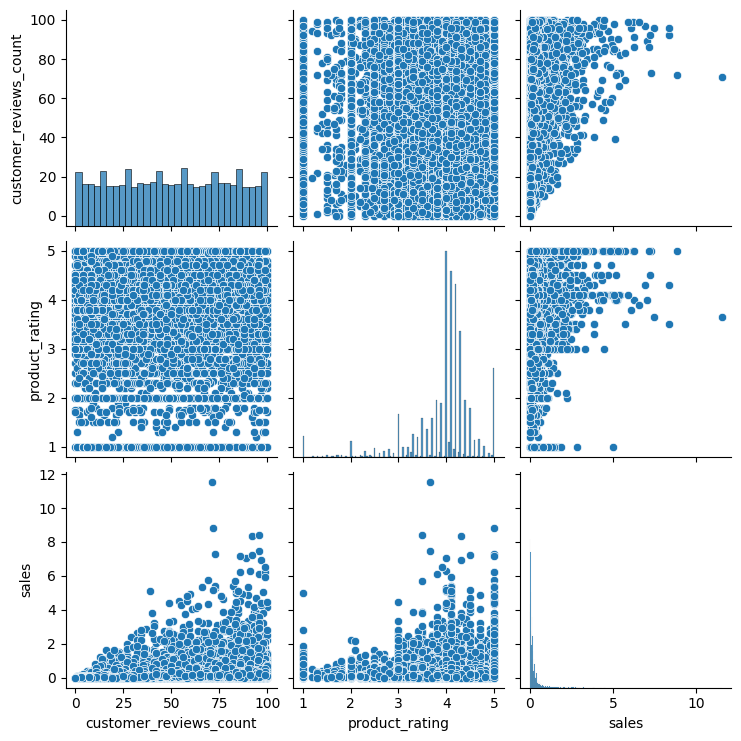

In [100]:
print(df[['customer_reviews_count', 'product_rating', 'sales']].describe())

correlation_matrix = df[['customer_reviews_count', 'product_rating', 'sales']].corr()
print(correlation_matrix)

plt.figure(figsize=(20,16))

sns.pairplot(df[['customer_reviews_count', 'product_rating', 'sales']])
plt.show()

       customer_reviews_count  product_rating         sales
count            27553.000000    27553.000000  27553.000000
mean                49.962363        3.963815      0.214139
std                 29.016464        0.671158      0.401008
min                  0.000000        1.000000      0.000000
25%                 25.000000        3.800000      0.040000
50%                 50.000000        4.100000      0.100000
75%                 75.000000        4.300000      0.240000
max                100.000000        5.000000     11.540000
                        customer_reviews_count  product_rating     sales
customer_reviews_count                1.000000       -0.001461  0.308496
product_rating                       -0.001461        1.000000  0.034206
sales                                 0.308496        0.034206  1.000000


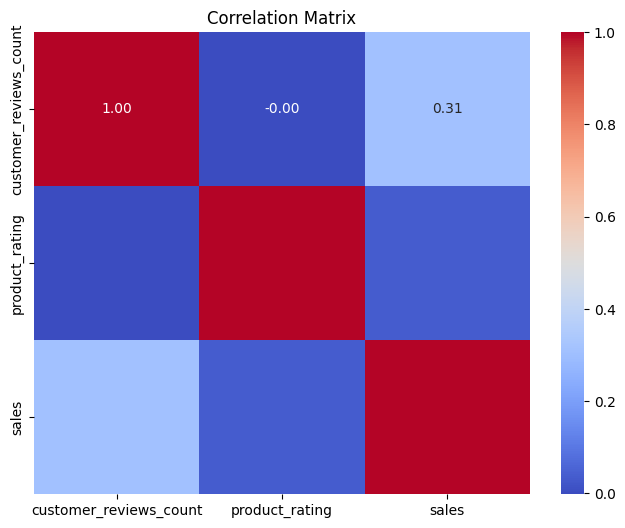

In [101]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Display summary statistics
print(df[['customer_reviews_count', 'product_rating', 'sales']].describe())

correlation_matrix = df[['customer_reviews_count', 'product_rating', 'sales']].corr()
print(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()